<a href="https://colab.research.google.com/github/ucfilho/marquesgabi/blob/master/Features_Determination_teste_007_dez_05_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mahotas

     |████████████████████████████████| 1.5MB 2.6MB/s 
  Created wheel for mahotas: filename=mahotas-1.4.9-cp36-cp36m-linux_x86_64.whl size=4263975 sha256=57b20b661101d2b252d636606a423222496945caf52686a2005d0377cced40cf
  Stored in directory: /root/.cache/pip/wheels/02/e7/50/b67eee3b19c479cc5b41f10230bf9c1556be6eaaf095c6e997
Successfully built mahotas


In [2]:

!git clone https://github.com/ucfilho/marquesgabi #clonar do Github
%cd marquesgabi

Cloning into 'marquesgabi'...
remote: Enumerating objects: 171, done.
remote: Counting objects: 100% (171/171), done.
remote: Compressing objects: 100% (171/171), done.
remote: Total 333 (delta 98), reused 0 (delta 0), pack-reused 162
Receiving objects: 100% (333/333), 7.52 MiB | 5.99 MiB/s, done.
Resolving deltas: 100% (184/184), done.
/content/marquesgabi


In [0]:
import numpy as np
import cv2
from skimage import data
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from skimage import io, util
import mahotas.features.texture as mht
import mahotas.features
import os 
import zipfile
from skimage import filters
from skimage import exposure
import skimage.feature as sk
from google.colab import files
from numpy import linalg as LA
from scipy.signal import find_peaks
from scipy.signal import peak_prominences
from scipy.signal import peak_widths
import re
import Go2BlackWhite
import Go2Mahotas
%matplotlib inline

In [0]:
Size=200 # tamanho da foto
Sub_Size=int(Size/5) # tamanho do fracionamento
Row_Crop=1/2 # posicao do corte
Crop=int(Size*Row_Crop)

In [5]:
!wget http://ftp.feq.ufu.br/ubirajara/GrBuInd.zip
Transfere='GrBuInd.zip'

--2019-12-05 12:26:16--  http://ftp.feq.ufu.br/ubirajara/GrBuInd.zip
Resolving ftp.feq.ufu.br (ftp.feq.ufu.br)... 200.19.144.11
Connecting to ftp.feq.ufu.br (ftp.feq.ufu.br)|200.19.144.11|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 497627 (486K) [application/zip]
Saving to: ‘GrBuInd.zip’

GrBuInd.zip         100%[===================>] 485.96K   224KB/s    in 2.2s    

2019-12-05 12:26:20 (224 KB/s) - ‘GrBuInd.zip’ saved [497627/497627]



In [0]:
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

In [0]:
# print(img_name)

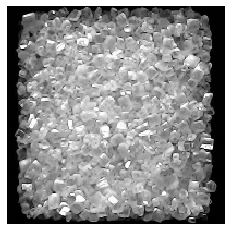

In [8]:
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) # ww contain all photos in black and white
plt.axis("off")
plt.imshow(ww[0], cmap = "gray")

In [0]:
# Find the list elements starting with specific letter
subs = 'B'
Buraco = [x for x in img_name if re.search(subs, x)] 
subs = 'G'
Grao = [x for x in img_name if re.search(subs, x)] 
subs = 'I'
Indef = [x for x in img_name if re.search(subs, x)] 

In [10]:
df=Go2Mahotas.Mahotas(ww[0],Size,Sub_Size,Crop,img_name) # find df texture for a given picture
print(df)

          ASM    constrast    correl  ...  dif entropy      IMC1      IMC2
0    0.012146   839.716383  0.922992  ...     5.360705 -0.553436  0.999757
1    0.009309   852.210273  0.919052  ...     5.430678 -0.547121  0.999766
2    0.008023   864.961744  0.914335  ...     5.494037 -0.540839  0.999770
3    0.004495   885.729068  0.907571  ...     5.558871 -0.533217  0.999772
4    0.002481   910.649248  0.898534  ...     5.616679 -0.525523  0.999770
..        ...          ...       ...  ...          ...       ...       ...
156  0.008712  1573.804771  0.810473  ...     5.662041 -0.511908  0.999565
157  0.012512  1526.464033  0.824425  ...     5.580811 -0.518453  0.999551
158  0.018239  1504.009837  0.833059  ...     5.495274 -0.526079  0.999535
159  0.020161  1492.755909  0.839546  ...     5.417776 -0.533902  0.999531
160  0.024144  1481.756316  0.844719  ...     5.339334 -0.541121  0.999515

[161 rows x 13 columns]


In [0]:
j=0
cont=-1
Posicao_Buraco=[]
for i in img_name:
  cont=cont+1
  for k in Buraco:
    if(i==k):
      Posicao_Buraco.append(cont)
j=0
cont=-1
Posicao_Grao=[]
for i in img_name:
  cont=cont+1
  for k in Grao:
    if(i==k):
      Posicao_Grao.append(cont)

j=0
cont=-1
Posicao_Indef=[]
for i in img_name:
  cont=cont+1
  for k in Indef:
    if(i==k):
      Posicao_Indef.append(cont)

# print(Posicao_Grao)
# print(Posicao_Buraco)
# print(Posicao_Indef)


In [12]:
'''
# compara entropia dos tres primeiros buracos
for i in range(3):
  k=Posicao_Buraco[i]
  df=Go2Mahotas.Mahotas(ww[k],Size,Sub_Size,Crop,img_name) 
  plt.figure(i+1)
  plt.plot(df['entropy'])
'''


"\n# compara entropia dos tres primeiros buracos\nfor i in range(3):\n  k=Posicao_Buraco[i]\n  df=Go2Mahotas.Mahotas(ww[k],Size,Sub_Size,Crop,img_name) \n  plt.figure(i+1)\n  plt.plot(df['entropy'])\n"

In [13]:
'''
# compara entropia dos tres primeiros graos
for i in range(3):
  k=Posicao_Grao[i]
  df=Go2Mahotas.Mahotas(ww[k],Size,Sub_Size,Crop,img_name) 
  plt.figure(i+1)
  plt.plot(df['entropy'])
'''

"\n# compara entropia dos tres primeiros graos\nfor i in range(3):\n  k=Posicao_Grao[i]\n  df=Go2Mahotas.Mahotas(ww[k],Size,Sub_Size,Crop,img_name) \n  plt.figure(i+1)\n  plt.plot(df['entropy'])\n"

In [14]:
'''
# compara entropia dos tres primeiros Indef
for i in range(3):
  k=Posicao_Indef[i]
  df=Go2Mahotas.Mahotas(ww[k],Size,Sub_Size,Crop,img_name) 
  plt.figure(i+1)
  plt.plot(df['entropy'])
'''

"\n# compara entropia dos tres primeiros Indef\nfor i in range(3):\n  k=Posicao_Indef[i]\n  df=Go2Mahotas.Mahotas(ww[k],Size,Sub_Size,Crop,img_name) \n  plt.figure(i+1)\n  plt.plot(df['entropy'])\n"

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


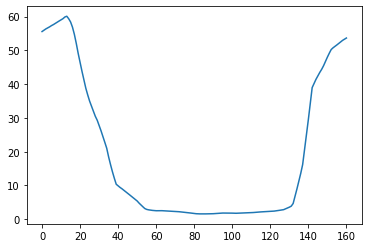

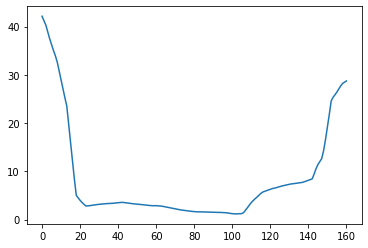

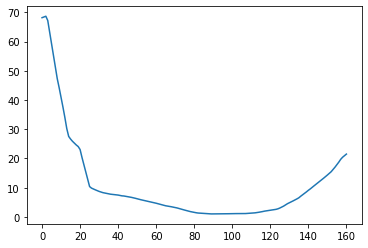

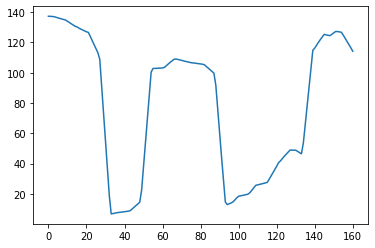

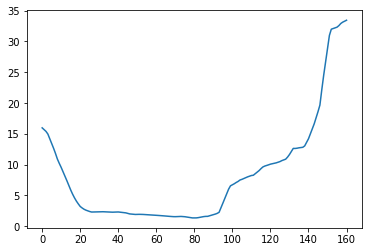

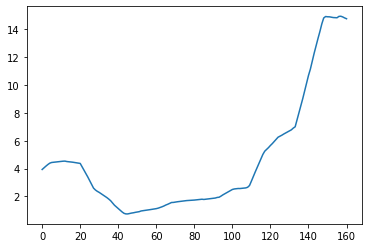

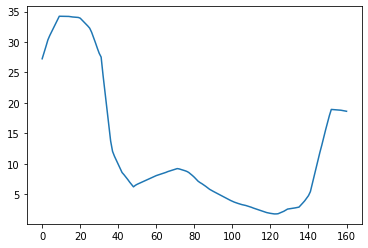

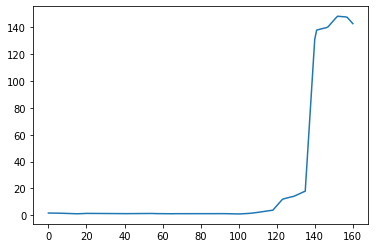

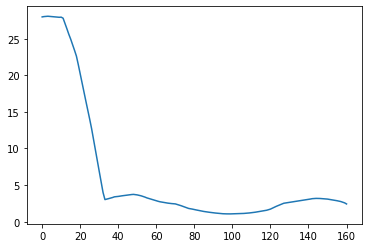

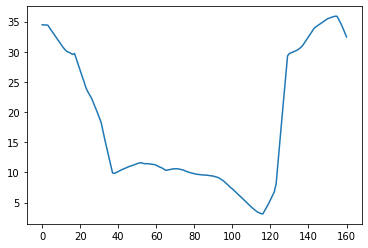

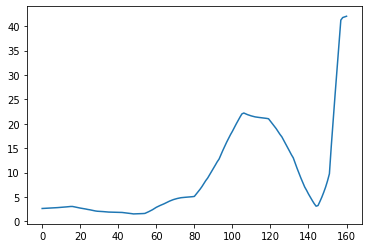

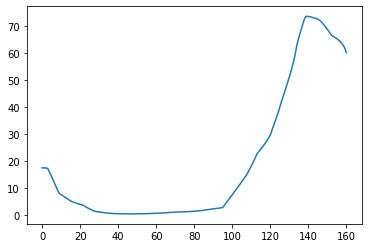

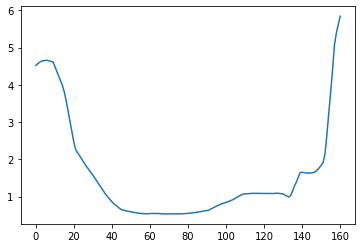

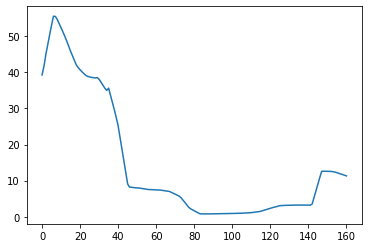

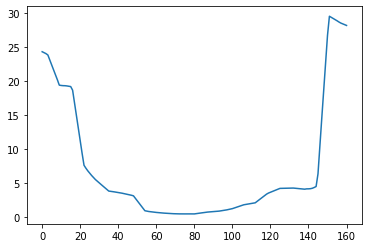

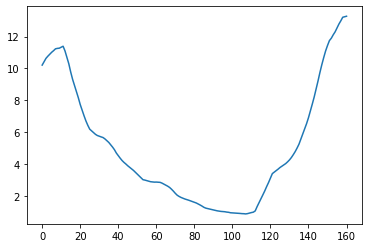

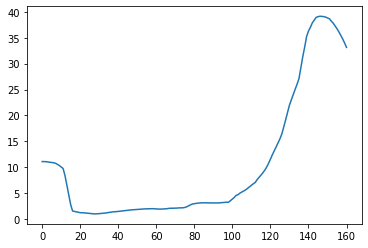

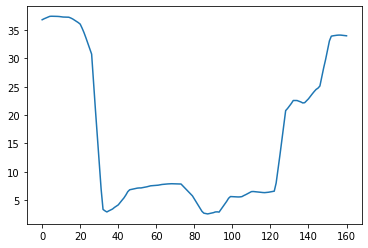

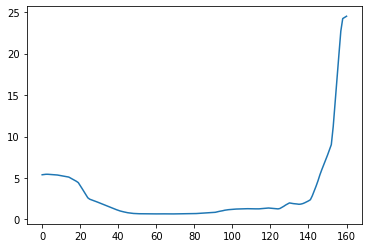

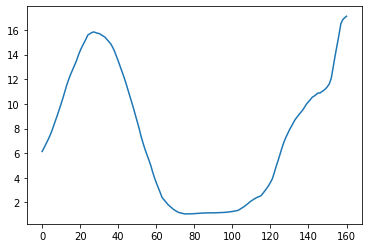

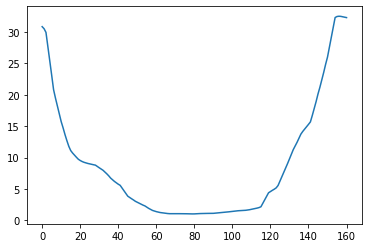

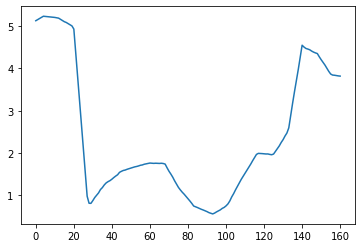

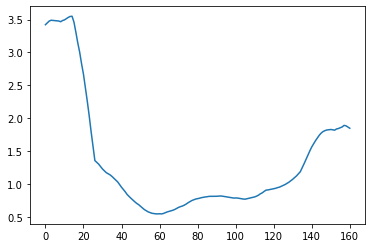

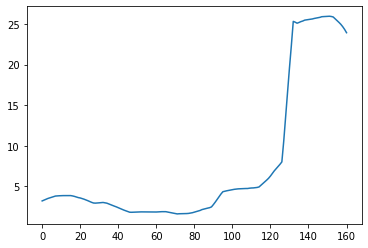

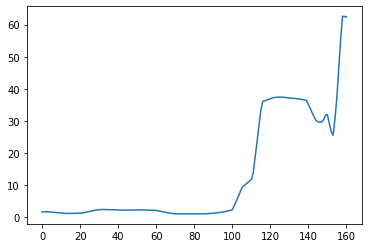

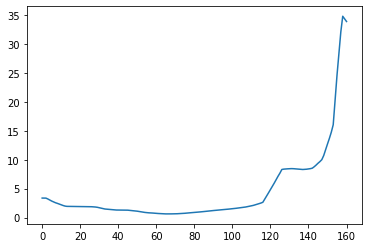

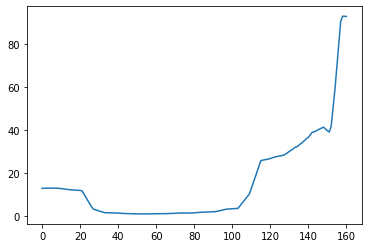

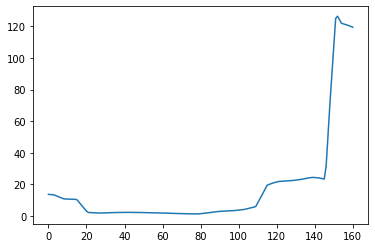

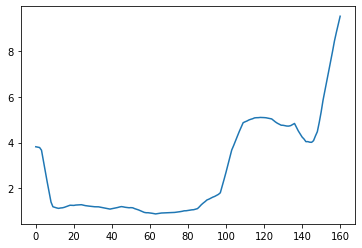

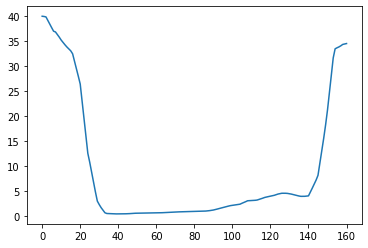

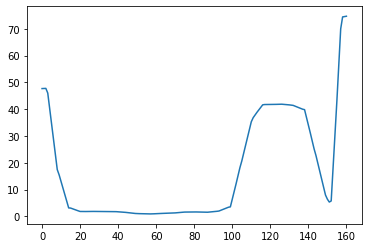

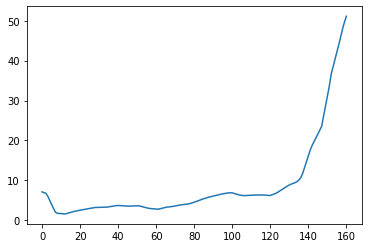

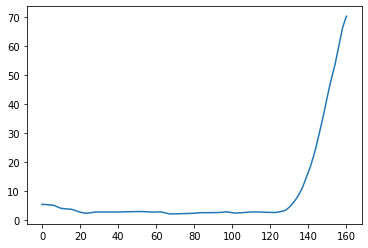

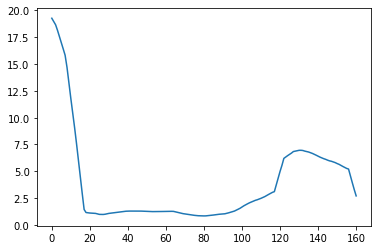

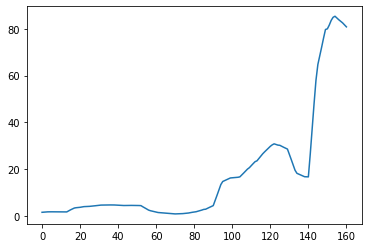

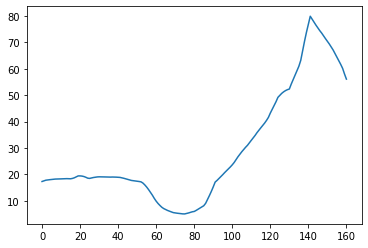

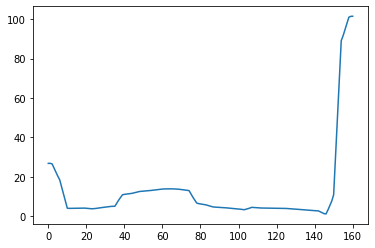

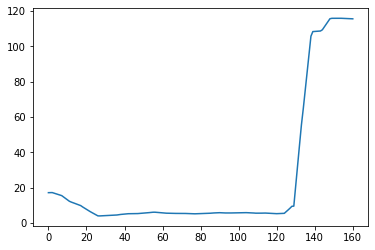

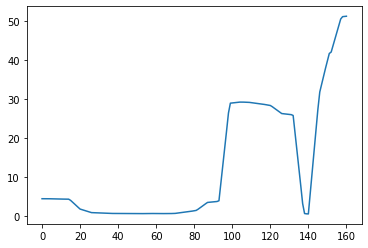

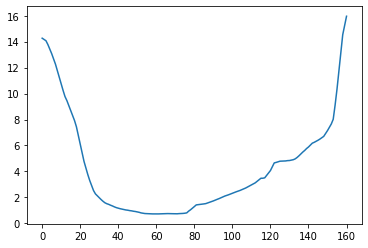

In [15]:
# compara constrast dos tres primeiros graos
Num=len(Posicao_Grao)
for i in range(Num):
  k=Posicao_Grao[i]
  df=Go2Mahotas.Mahotas(ww[k],Size,Sub_Size,Crop,img_name) 
  plt.figure(i+1)
  plt.plot(df['constrast'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


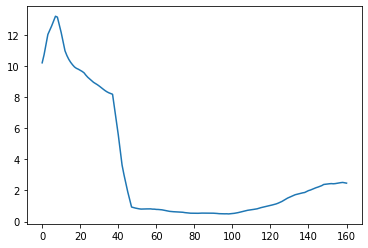

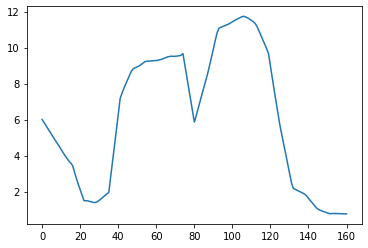

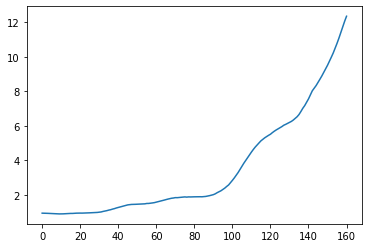

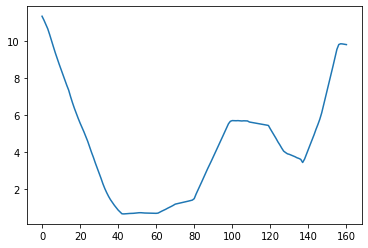

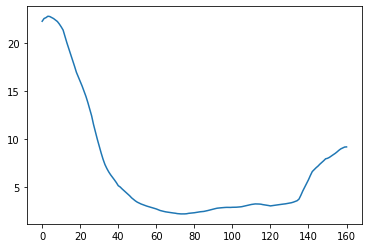

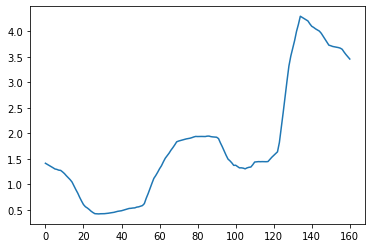

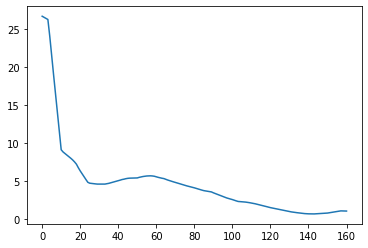

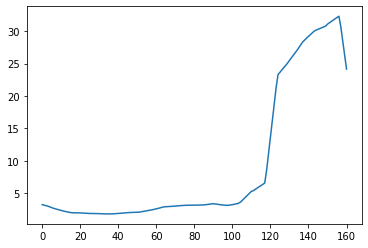

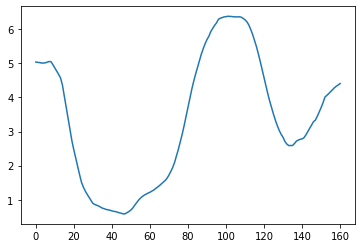

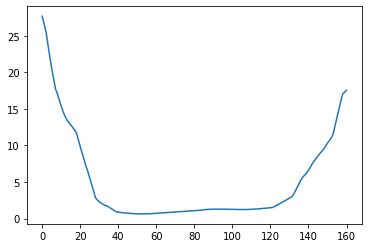

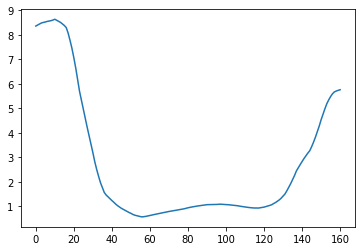

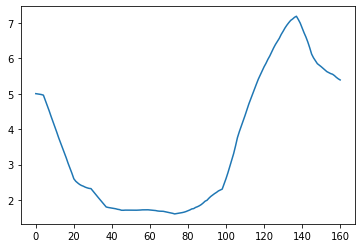

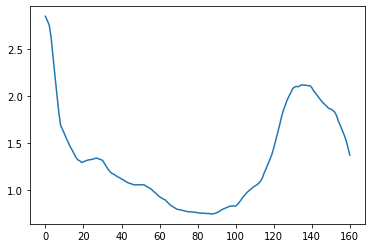

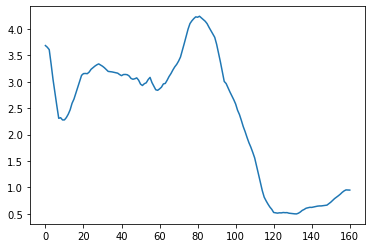

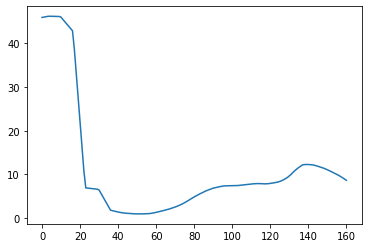

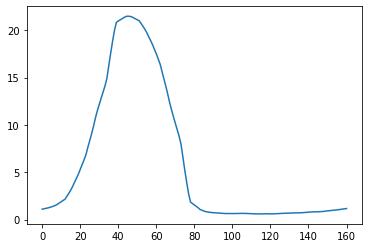

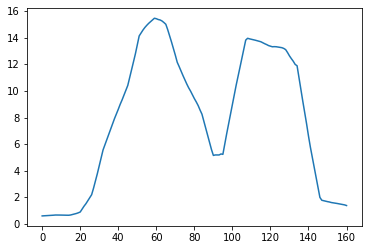

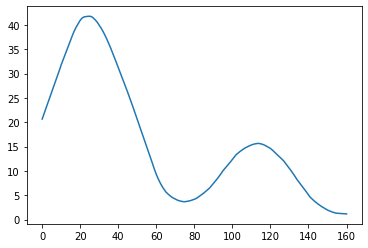

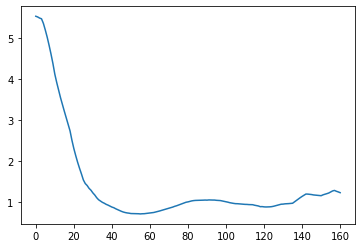

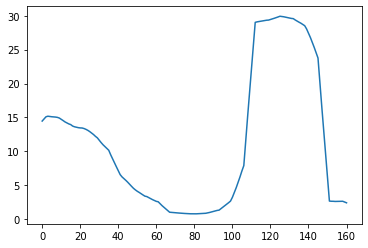

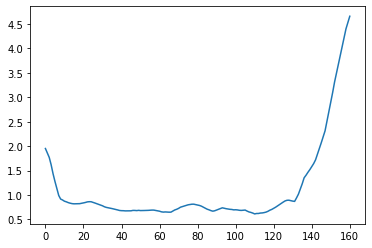

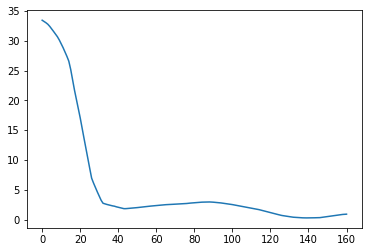

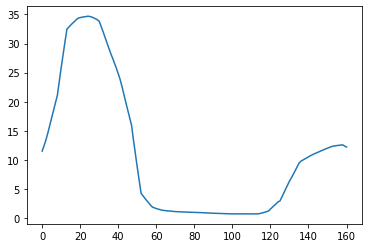

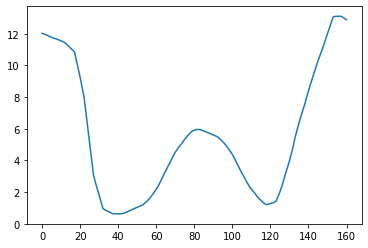

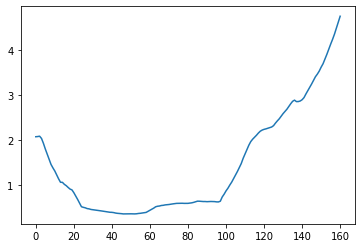

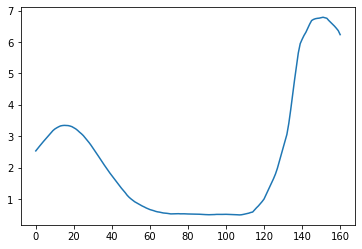

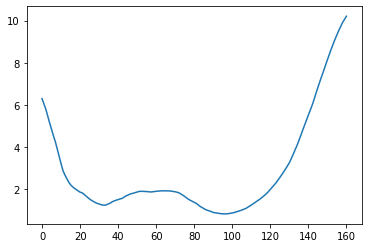

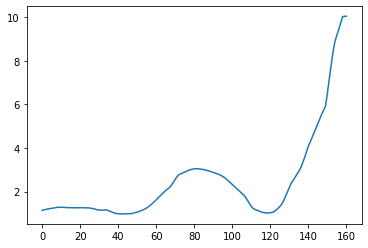

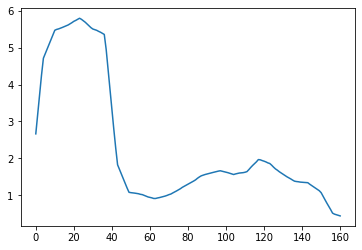

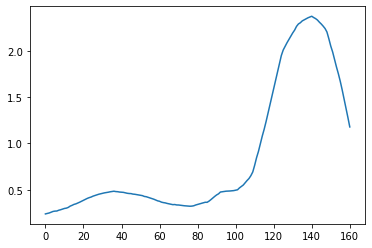

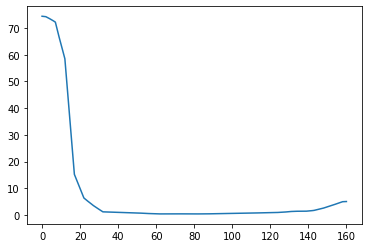

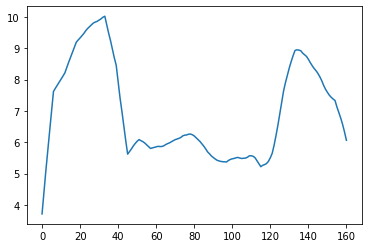

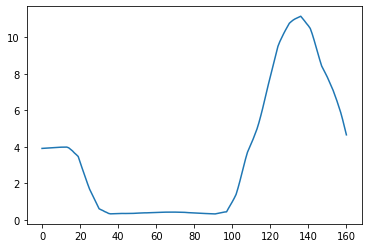

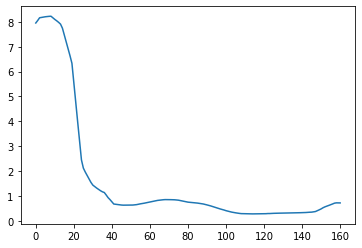

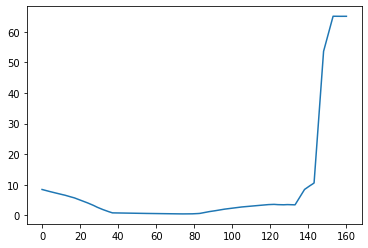

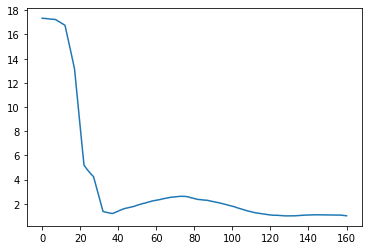

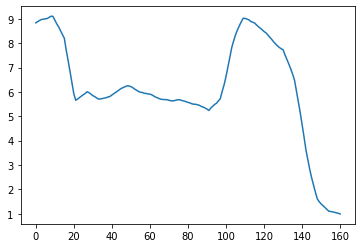

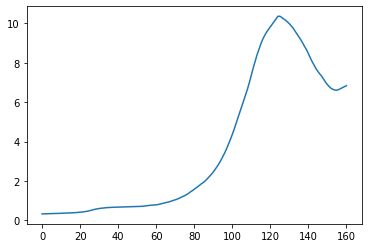

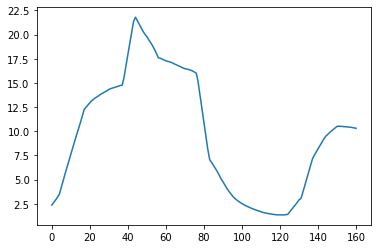

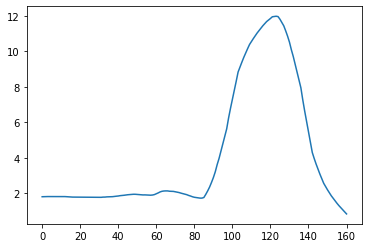

In [18]:
# compara constrast dos tres primeiros buracos
Num=len(Posicao_Buraco)
for i in range(Num):
  k=Posicao_Buraco[i]
  df=Go2Mahotas.Mahotas(ww[k],Size,Sub_Size,Crop,img_name) 
  plt.figure(i+1)
  plt.plot(df['constrast'])

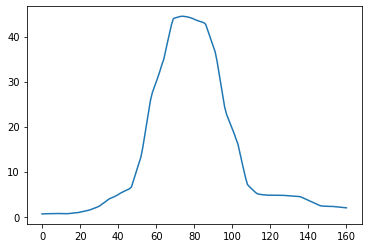

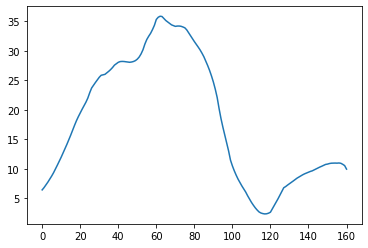

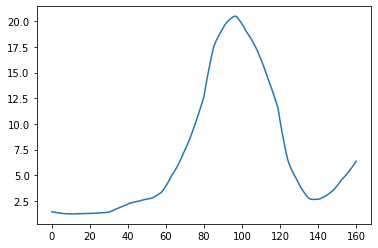

In [17]:
# compara constrast dos tres primeiros Indef
for i in range(3):
  k=Posicao_Indef[i]
  df=Go2Mahotas.Mahotas(ww[k],Size,Sub_Size,Crop,img_name) 
  plt.figure(i+1)
  plt.plot(df['constrast'])